# **Task 1 : Stock Prediction**

##### Take stock price of any company you want and predicts its price by using LSTM.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("TSLA.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


#### Visualizing the closing stock

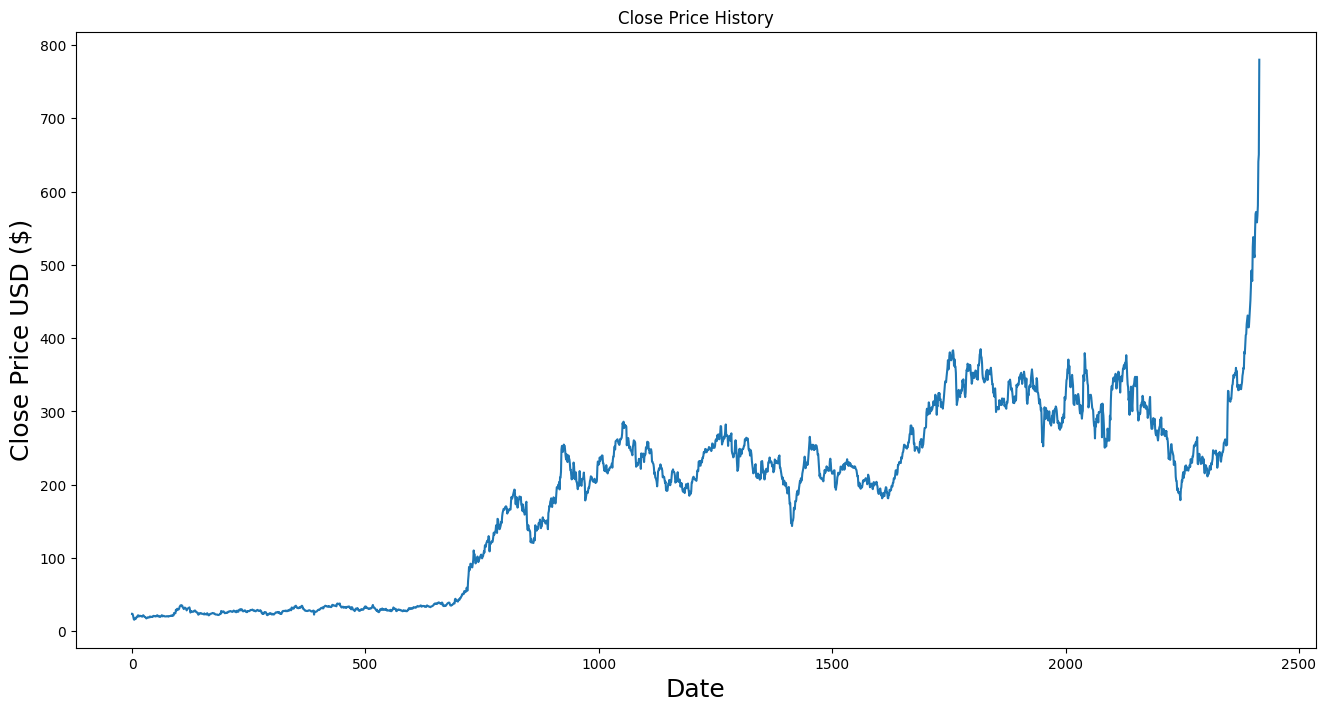

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

#### preprocessing

In [ ]:
data = df.filter(['Close']).values

#### Normalizing the data using the MinMaxScaler:

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

#### Training the Dataset

In [ ]:
train_data = scaled_data[:int(len(scaled_data)*0.8)]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Building the LSTM model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
59/59 [==============================] - 19s 204ms/step - loss: 0.0045
Epoch 2/50
59/59 [==============================] - 7s 119ms/step - loss: 9.5217e-04
Epoch 3/50
59/59 [==============================] - 6s 98ms/step - loss: 8.9048e-04
Epoch 4/50
59/59 [==============================] - 7s 123ms/step - loss: 8.3907e-04
Epoch 5/50
59/59 [==============================] - 6s 102ms/step - loss: 8.4665e-04
Epoch 6/50
59/59 [==============================] - 8s 140ms/step - loss: 7.4200e-04
Epoch 7/50
59/59 [==============================] - 8s 141ms/step - loss: 7.0917e-04
Epoch 8/50
59/59 [==============================] - 8s 140ms/step - loss: 6.5621e-04
Epoch 9/50
59/59 [==============================] - 9s 148ms/step - loss: 6.5252e-04
Epoch 10/50
59/59 [==============================] - 6s 108ms/step - loss: 6.0371e-04
Epoch 11/50
59/59 [==============================] - 9s 148ms/step - loss: 5.6240e-04
Epoch 12/50
59/59 [==============================] - 7s 114ms/step 

#### Predictions on the test data

In [ ]:
test_data = scaled_data[int(len(scaled_data)*0.8) - 60:]
x_test = []
y_test = data[int(len(data)*0.8):, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 2s 27ms/step


####  Actual price vs  Predicted price

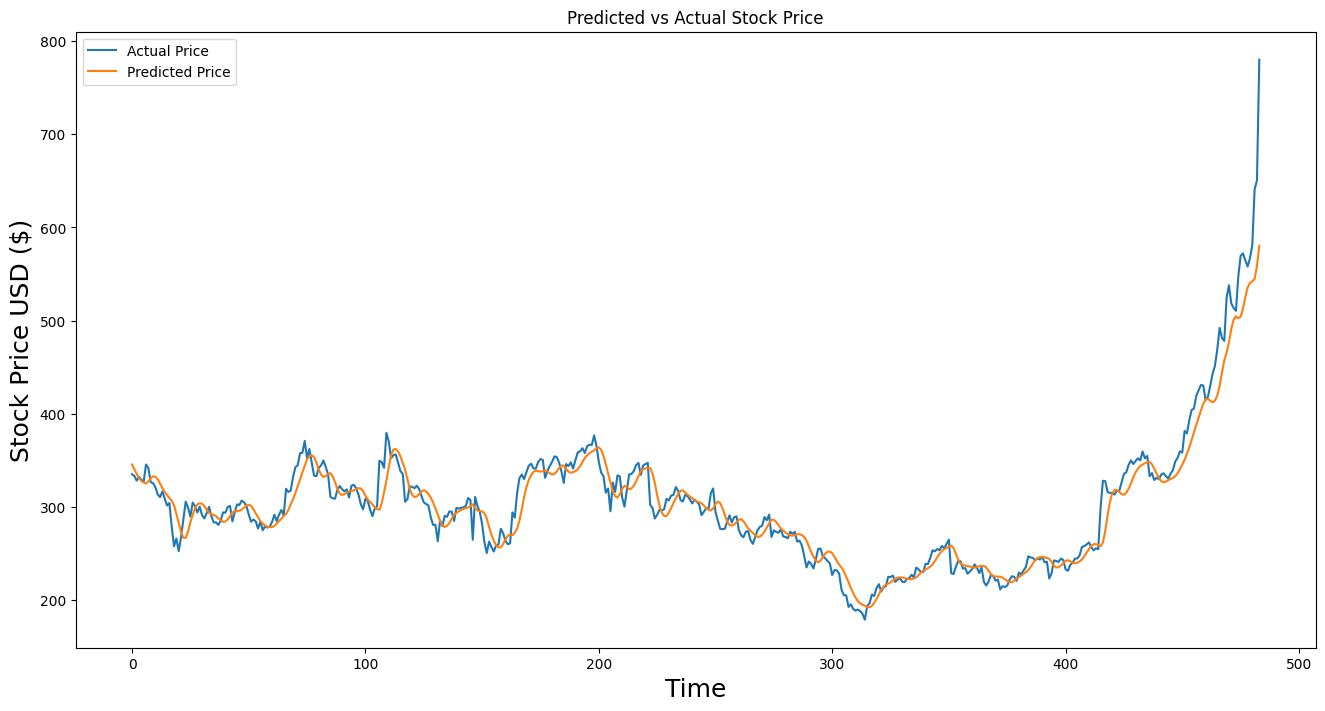

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Predicted vs Actual Stock Price')
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Stock Price USD ($)', fontsize=18)
plt.legend()
plt.show()